In [2]:
with open('examples/0011.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)

# -1 -2 0
# off or off |00> not |11>
# 1 -2 0
# off or on |01> not |10>
"""
h q[0];
h q[1];
z q[0];
x q[0];
cx q[1],q[0];
"""

p cnf 2 2
-1 -2 0
1 -2 0



'\nh q[0];\nh q[1];\nz q[0];\nx q[0];\ncx q[1],q[0];\n'

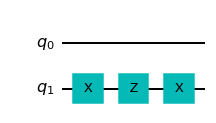

In [3]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/0011.dimacs')
oracle.draw('mpl')

In [4]:
def display_unitary(qc, prefix=""):
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    qc = qc.copy()
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))
    
display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

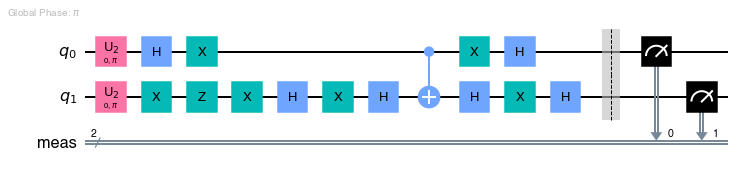

In [5]:
from qiskit import QuantumCircuit
init = QuantumCircuit(2)
init.h([0,1])

from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)
qc = init.compose(grover_operator)
qc.measure_all()
qc.decompose().draw('mpl')

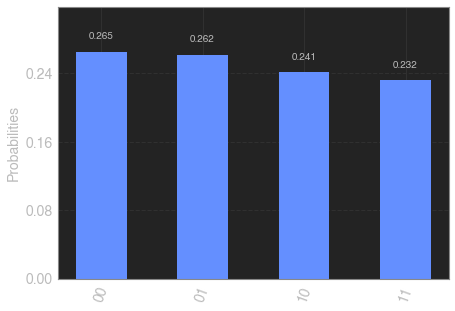

In [6]:
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)